In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:

# Define the model
model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(10, activation='softmax')
    ])

In [6]:
# Compile the model
model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
    )

In [7]:
# Train the model
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5014 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3786 - accuracy: 0.8631
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3392 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3141 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2950 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2831 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2702 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2601 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2501 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2

In [8]:
#Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3347 - accuracy: 0.8819
Test accuracy: 0.8819000124931335


In [10]:
# Make predictions
predictions = model.predict(test_images)
predicted_labels =np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


In [11]:

# Show some example images and their predicted labels
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

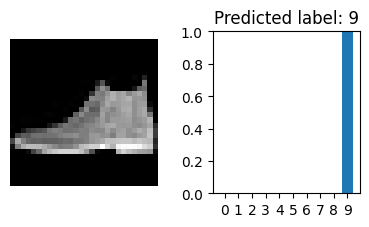

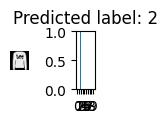

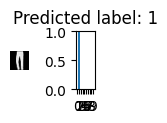

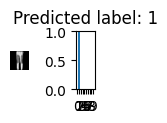

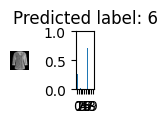

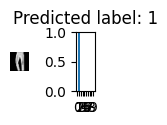

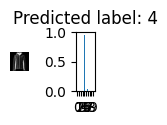

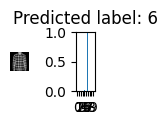

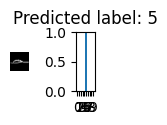

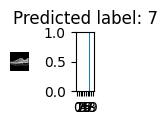

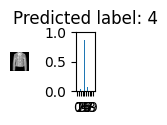

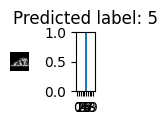

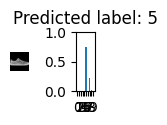

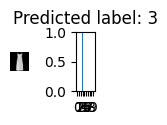

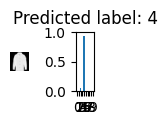

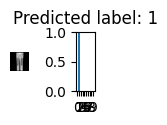

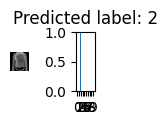

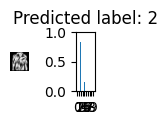

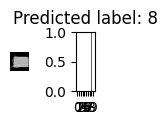

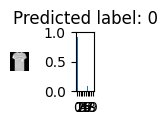

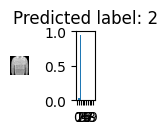

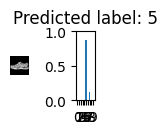

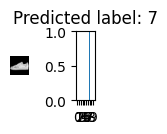

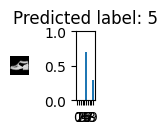

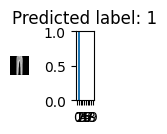

In [12]:

plt.figure(figsize=(2 * 2 *num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.axis('off')
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plt.bar(range(10),predictions[i])
    plt.xticks(range(10))
    plt.ylim([0, 1])
    plt.tight_layout()
    plt.title(f"Predicted label: {predicted_labels[i]}")
    plt.show()